<a href="https://colab.research.google.com/github/AyzaOyun/pet-projects/blob/main/dashboard%20for%20report%20of%20the%20ANO%20%22Let's%20Win%20Cancer%22/%20rak_pobedim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитический отчет АНО "Рак победим"
Исполнитель: Оюн Айза, https://t.me/Ayza_Oyun
## Описание проекта:

В рамках проекта работаем с реальными сырыми данными от АНО Рак победим https://rak-pobedim.com/
Необходимо построить двухстраничный дашборд по подопечным и донорам фонда.
Также нужно будет провести предобработку данных и дать рекомендации по сбору информации.
В дашборде по подопечным следует отразить:
- географию подопечных и доноров;
- возраст;
- таблицу с датой рождения с фильтром по текущей дате - чтобы было видно, когда поздравить подопечных с Днем Рождения;
- динамику заполнения анкет по полю “Дата заполнения анкеты”;
- откуда узнали о фонде;
- сферу деятельности подопечных;
- диагнозы подопечных;
- стадия лечения;
- какая требуется помощь;
- динамика;
- можно предложить другие интересные метрики, которые возможно рассчитать и отразить на дашборде.

В дашборде по донорам следует отразить:
- тип платежа
- платёжный оператор
- способы платежа
- динамика платежей
- суммы
- статусы
- кампании
- другие интересные инстайты и метрики, которые возможно рассчитать и отобразить на дашборде.

Также будет возможность построить еще одну страницу дашборда с аналитикой доноров и пожертвований фонда.

## Цель проекта:
построение двухстраничного дашборда в DataLens.
На первой странице (вкладке) которого будет отражены метрики по подопечным фонда,
на второй странице (вкладке) – метрики по донорам фонда.

## Исходные данные:
Данные о подопечных:
Google Sheets
https://docs.google.com/spreadsheets/d/1_S4m-SK2juop8FkCMVCFIAJcUi2zFBj25VVOsUAaOT4/edit#gid=1721685457
Я.Диск
https://disk.yandex.ru/i/wF4zNVkgsA1h0A

Данные о донорах:
Я.Диск
https://disk.yandex.ru/d/uenb_rcX8ECmcw
Google Sheets
https://docs.google.com/spreadsheets/d/1OfWqpwyiTnM9fTbrgxIkK_xXJL5803p-Y-FmECmOspU/edit#gid=42853625

Ссылка на ТЗ
https://docs.google.com/document/d/1mAfky7XcER8cXnjPNjBvBUgmBQXjLmwudKn_AR9DrsI/edit?usp=sharing

## Описание данных:
Таблица с данными о донорах содержит следующие столбцы:
- ID пожертвования;
- ID донора;
- Тип платежа;
- Плат. оператор;
- Способ платежа;
- Полная сумма;
- Дата пожертвования;
- Статус;
- Подписка на рассылку;
- Date

Таблица с данными о пациентах содержит следующие столбцы:
- ФИО;
- Email;
- Телефон;
- Дата рождения;
- Город;
- Сфера деятельности;
- Диагноз;
- Этап;
- Помощь;
- Группы;
- Как у знали;
- Дата заполнения анкеты;
- requestid;
- sent;
- referer;
- Form name.


## План работы:
1. Загрузить данные
2. Провести предобработку опираясь на справочник
https://docs.google.com/spreadsheets/d/1ODxYYhWq1OMntpGo9gD8jYKJQV6lGfw0fAtkyhCr1Q0/edit#gid=822464959
3. Анализ данных
4. Построение дашборда

# Загрузить данные

In [2]:
#Устанавливаем библиотеки для нечеткого поиска
!pip install fuzzywuzzy --quiet
!pip install python-Levenshtein --quiet
#Эта библиотека для поиска римских цифр
!pip install roman --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re
import roman

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from datetime import datetime as dt

In [5]:
df_participants = pd.read_excel('https://docs.google.com/spreadsheets/d/1PsexumMoUXCMQP_crX_m5pNYsYsw_fyk/export?format=xls')
df_participants.head(2)

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как у знали,Дата заполнения анкеты,requestid,sent,referer,Form name
0,User_01_01,Email_0001,tel_number_0001,1969-11-15,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,Знакомые,2021-10-21,3284862:2572982821,2021-10-21 12:02:08,http://rak-pobedim.com/anketa,Анкета участника
1,User_01_02,Email_0002,tel_number_0002,1982-08-20,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,NaN,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы орган...,Интернет,2021-10-21,3284862:2575517051,2021-10-21 21:14:37,http://rak-pobedim.com/anketa,Анкета участника


In [6]:
df_donors = pd.read_excel('https://docs.google.com/spreadsheets/d/1S_ysid01BQ3sx3xAM64vbE-mIU67Hza2/export?format=xlsx')
df_donors.head(2)

,ID пожертвования,ID донора,Тип платежа,Плат. оператор,Способ платежа,Полная сумма,Дата пожертвования,Статус,Подписка на рассылку,Date
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:15",Оплачено,Нет,2024-01-15
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:10",Попытка пожертвовать,Нет,2024-01-15


In [7]:
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ФИО                     1568 non-null   object        
 1   Email                   1423 non-null   object        
 2   Телефон                 1568 non-null   object        
 3   Дата рождения           1493 non-null   datetime64[ns]
 4   Город                   1565 non-null   object        
 5   Сфера деятельности      1377 non-null   object        
 6   Диагноз                 1566 non-null   object        
 7   Этап                    1542 non-null   object        
 8   Помощь                  780 non-null    object        
 9   Группы                  1549 non-null   object        
 10  Как у знали             1520 non-null   object        
 11  Дата заполнения анкеты  1557 non-null   datetime64[ns]
 12  requestid               1568 non-null   object  

In [8]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID пожертвования      581 non-null    int64         
 1   ID донора             581 non-null    object        
 2   Тип платежа           581 non-null    object        
 3   Плат. оператор        581 non-null    object        
 4   Способ платежа        581 non-null    object        
 5   Полная сумма          581 non-null    int64         
 6   Дата пожертвования    581 non-null    object        
 7   Статус                581 non-null    object        
 8   Подписка на рассылку  581 non-null    object        
 9   Date                  581 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 45.5+ KB


Тип данных соответствует требуемым. В данных не все графы заполнены. Скорее всего,  пропуски появились по причине того, что респонденты могли не заполнить часть полей в анкете.

# Провести предобработку данных

In [9]:
#проверяем количество уникальных значений в столбцах и выявляет наиболее частые значения
for row in df_participants:
  display(f'Количество уникальных значений в столбце {row}: {df_participants[row].nunique()}')
  display(df_participants[row].value_counts()[:5])

'Количество уникальных значений в столбце ФИО: 1568'

ФИО
User_01_01      1
User_01_1054    1
User_01_1052    1
User_01_1051    1
User_01_1050    1
Name: count, dtype: int64

'Количество уникальных значений в столбце Email: 1423'

Email
Email_0001    1
Email_1054    1
Email_1025    1
Email_1024    1
Email_1023    1
Name: count, dtype: int64

'Количество уникальных значений в столбце Телефон: 1568'

Телефон
tel_number_0001    1
tel_number_1054    1
tel_number_1052    1
tel_number_1051    1
tel_number_1050    1
Name: count, dtype: int64

'Количество уникальных значений в столбце Дата рождения: 1392'

Дата рождения
1979-05-11    4
1979-04-25    3
1973-06-03    3
1970-11-21    3
1971-08-23    3
Name: count, dtype: int64

'Количество уникальных значений в столбце Город: 401'

Город
Ростов-на-Дону                  354
Москва                          116
Краснодар Краснодарский край     82
Тюмень Тюменская область         60
Санкт-Петербург                  50
Name: count, dtype: int64

'Количество уникальных значений в столбце Сфера деятельности: 610'

Сфера деятельности
Домохозяйка    82
Бухгалтер      71
Пенсионер      69
Не работаю     31
Учитель        29
Name: count, dtype: int64

'Количество уникальных значений в столбце Диагноз: 828'

Диагноз
РМЖ 2 стадия    109
РМЖ              95
РМЖ 2 ст         61
РМЖ 3 стадия     43
РМЖ 2ст          41
Name: count, dtype: int64

'Количество уникальных значений в столбце Этап: 582'

Этап
Ремиссия             321
Химиотерапия         288
Гормонотерапия        41
Таргетная терапия     34
Химия                 26
Name: count, dtype: int64

'Количество уникальных значений в столбце Помощь: 539'

Помощь
Психологическую    48
Общение            22
Психологическая    20
Информационную     18
Любую              13
Name: count, dtype: int64

'Количество уникальных значений в столбце Группы: 87'

Группы
#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы организации; Дари Эмоции                     155
#ЛовлюЭмоции; Клуб “Рак Победим”; Рак Победим РМЖ; Анонсы организации; Дари Эмоции    136
Клуб “Рак Победим”                                                                    108
Рак Победим РМЖ                                                                        98
Движение #ловлюэмоции; Клуб Рак победим; Анонсы организации; Дари Эмоции; ЗОЖ          84
Name: count, dtype: int64

'Количество уникальных значений в столбце Как у знали: 7'

Как у знали
Знакомые                       763
Интернет                       623
Объявление в мед.учреждении     74
Свой вариант                    54
Интренет                         4
Name: count, dtype: int64

'Количество уникальных значений в столбце Дата заполнения анкеты: 681'

Дата заполнения анкеты
2021-03-24    61
2021-05-02    57
2021-03-25    43
2022-01-06    23
2022-01-09    21
Name: count, dtype: int64

'Количество уникальных значений в столбце requestid: 1568'

requestid
3284862:2572982821    1
3284862:5311039021    1
3284862:5309183011    1
3284862:5308481621    1
3284862:5308303461    1
Name: count, dtype: int64

'Количество уникальных значений в столбце sent: 1568'

sent
2021-10-21 12:02:08    1
2023-10-20 14:51:19    1
2023-10-20 08:58:15    1
2023-10-20 02:25:23    1
2023-10-19 23:51:12    1
Name: count, dtype: int64

'Количество уникальных значений в столбце referer: 1'

referer
http://rak-pobedim.com/anketa    1568
Name: count, dtype: int64

'Количество уникальных значений в столбце Form name: 2'

Form name
Анкета участника      1566
Предложение помощи       1
Name: count, dtype: int64

Видим, что не все графы анкеты заполнены. В пустых графах укажем "не указано".

In [10]:
#заполняем пропуски
df_participants = df_participants.fillna('Не указано')

In [11]:
#проверяем количество уникальных значений в столбцах и выявляет наиболее частые значения
for row in df_donors:
  display(f'Количество уникальных значений в столбце {row}: {df_donors[row].nunique()}')
  display(df_donors[row].value_counts()[:5])

'Количество уникальных значений в столбце ID пожертвования: 581'

ID пожертвования
1718    1
1089    1
1045    1
1044    1
1039    1
Name: count, dtype: int64

'Количество уникальных значений в столбце ID донора: 229'

ID донора
f2518347bd38664031b51956736c2926be229ddc0e6f8dc77f863c9431926386    23
1fcda2baec2b4bf47017c102677761805271d27dbacb5763eb153811921b6e65    22
4ab4043f680b8dc8159510d77804de99df396f6e332892a81ce02a1934af2555    22
d0b6e3a433a51d7ae1a1a0a0ca72a5bda61f8e9f43c54715e77d4c431dad0fbd    21
aa1873fce203131e0b67c4aedb4d49264feb559a1dbeb4e0becd67fc0e77a1e9    18
Name: count, dtype: int64

'Количество уникальных значений в столбце Тип платежа: 3'

Тип платежа
Разовое                     227
Все рекуррентные платежи    218
Рекуррентные подписки       136
Name: count, dtype: int64

'Количество уникальных значений в столбце Плат. оператор: 5'

Плат. оператор
CloudPayments          572
ЮKassa                   4
Квитанции                3
Текстовое сообщение      1
MIXPLAT                  1
Name: count, dtype: int64

'Количество уникальных значений в столбце Способ платежа: 5'

Способ платежа
Банковская карта                  574
Банковская платёжная квитанция      3
ЮMoney                              2
Дополнительные способы              1
Платежи с помощью SMS               1
Name: count, dtype: int64

'Количество уникальных значений в столбце Полная сумма: 39'

Полная сумма
500     190
200     116
1000     71
100      51
2000     25
Name: count, dtype: int64

'Количество уникальных значений в столбце Дата пожертвования: 560'

Дата пожертвования
13.02.2022, 18:24    4
01.03.2023, 12:24    4
16.03.2023, 13:48    3
28.05.2023, 17:12    2
14.05.2023, 18:15    2
Name: count, dtype: int64

'Количество уникальных значений в столбце Статус: 3'

Статус
Оплачено                     433
Попытка пожертвовать         108
Платёж завершён с ошибкой     40
Name: count, dtype: int64

'Количество уникальных значений в столбце Подписка на рассылку: 1'

Подписка на рассылку
Нет    581
Name: count, dtype: int64

'Количество уникальных значений в столбце Date : 269'

Date 
2023-05-14    22
2023-08-30    19
2023-04-23    11
2022-12-26    11
2023-04-27     8
Name: count, dtype: int64

In [12]:
df_donors = df_donors.fillna('Не указано')

In [13]:
df_participants.head(2)

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как у знали,Дата заполнения анкеты,requestid,sent,referer,Form name
0,User_01_01,Email_0001,tel_number_0001,1969-11-15 00:00:00,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,Знакомые,2021-10-21 00:00:00,3284862:2572982821,2021-10-21 12:02:08,http://rak-pobedim.com/anketa,Анкета участника
1,User_01_02,Email_0002,tel_number_0002,1982-08-20 00:00:00,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы орган...,Интернет,2021-10-21 00:00:00,3284862:2575517051,2021-10-21 21:14:37,http://rak-pobedim.com/anketa,Анкета участника


In [14]:
#переименуем названия столбцов для удобства
#df_participants = df_participants.rename(columns={'ФИО': 'user', 'Email': 'email', 'Телефон': 'phone', 'Дата рождения': 'date_of_birth', 'Город': 'city', 'Сфера деятельности': 'activity', 'Диагноз': 'diagnosis', 'Этап': 'stage', 'Помощь': 'help', 'Группы': 'groups', 'Как узнали': 'source', 'Дата заполнения анкеты': 'date_of_completion', 'Form name': 'form_name'})

# Подопечные

## Определяем город

In [15]:
#смотрим фактический список городов в данных
df_participants['Город'].unique()

array(['Краснодар Краснодарский край', 'г. Пушкин Санкт-Петербург',
       'Сургут ХМАО', 'Ростов-на-Дону',
       'Нижний Новгород Нижегородская область', 'Москва',
       'Чебоксары Чувашская Республика', 'Уфа Башкортостан',
       'Выборг Ленинградская область', 'Батайск Ростовская область',
       'Барнаул Алтайский край', 'Ессентуки Ставропольский край',
       'Новороссийск Краснодарский край',
       'Комсомольск-на-Амуре Хабаровский край', 'Санкт-Петербург',
       'Ярославль Ярославская область',
       'п. Чернышевский Забайкальский край', 'Казань Татарстан',
       'Сочи Краснодарский край', 'Николаев Украина',
       'Кострома Костромская область', 'Аксай Ростовская область',
       'с. Фершампенуаз Челябинская область',
       'Александров Владимирская область', 'Ростов-на-дону',
       'Гай Оренбургская область', 'Магадан Магаданская область',
       'Энгельс Саратовская область', 'Пятигорск Ставропольский край',
       'Новочеркасск Ростовская область', 'Ростова-на-Дону'

In [16]:
cities = pd.read_excel('https://docs.google.com/spreadsheets/d/1mau2qZiWrSJsyM-W8nAAS89MzU9G-545/export?format=xlsx', sheet_name='Города')
cities.head(2)

,id,name,type,region,coords
0,1,Красный Сулин,город,Ростовская область,"[47.8815133907,40.0553169561]"
1,2,Сальск,город,Ростовская область,"[46.480396424,41.5374105563]"


In [17]:
#создаем список городов
list_of_cities = cities['name'].unique()

In [18]:
#применим алгоритм нечеткого поиска
df_participants[['city', 'city_score']] = df_participants['Город'].apply(lambda x: process.extractOne(x, list_of_cities)).apply(pd.Series)

In [19]:
df_participants.head(2)

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как у знали,Дата заполнения анкеты,requestid,sent,referer,Form name,city,city_score
0,User_01_01,Email_0001,tel_number_0001,1969-11-15 00:00:00,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,Знакомые,2021-10-21 00:00:00,3284862:2572982821,2021-10-21 12:02:08,http://rak-pobedim.com/anketa,Анкета участника,Краснодар,90
1,User_01_02,Email_0002,tel_number_0002,1982-08-20 00:00:00,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы орган...,Интернет,2021-10-21 00:00:00,3284862:2575517051,2021-10-21 21:14:37,http://rak-pobedim.com/anketa,Анкета участника,Санкт-Петербург,90


In [20]:
#находим топ-30 городов
top_city = df_participants['city'].value_counts().head(30)
top_city

city
Ростов-на-Дону     374
Краснодар          124
Москва             118
Тюмень              61
Орск                56
Санкт-Петербург     53
Оренбург            35
Батайск             32
Саратов             29
Сочи                25
Таганрог            24
Ставрополь          22
Арск                21
Ростов              20
Шахты               17
Новочеркасск        16
Красноярск          16
Азов                14
Казань              14
Воронеж             12
Волгоград           12
Приморск            10
Энгельс             10
Аксай                9
Новосибирск          9
Калининград          8
Красный Сулин        8
Сальск               8
Омск                 8
Чебоксары            8
Name: count, dtype: int64

In [21]:
#функция для визуализации
def graphics(row):
    row.sort_values().plot(kind='barh', title =f'"{row.name}"', xlabel="Количество подопечных", figsize=(12, 8))

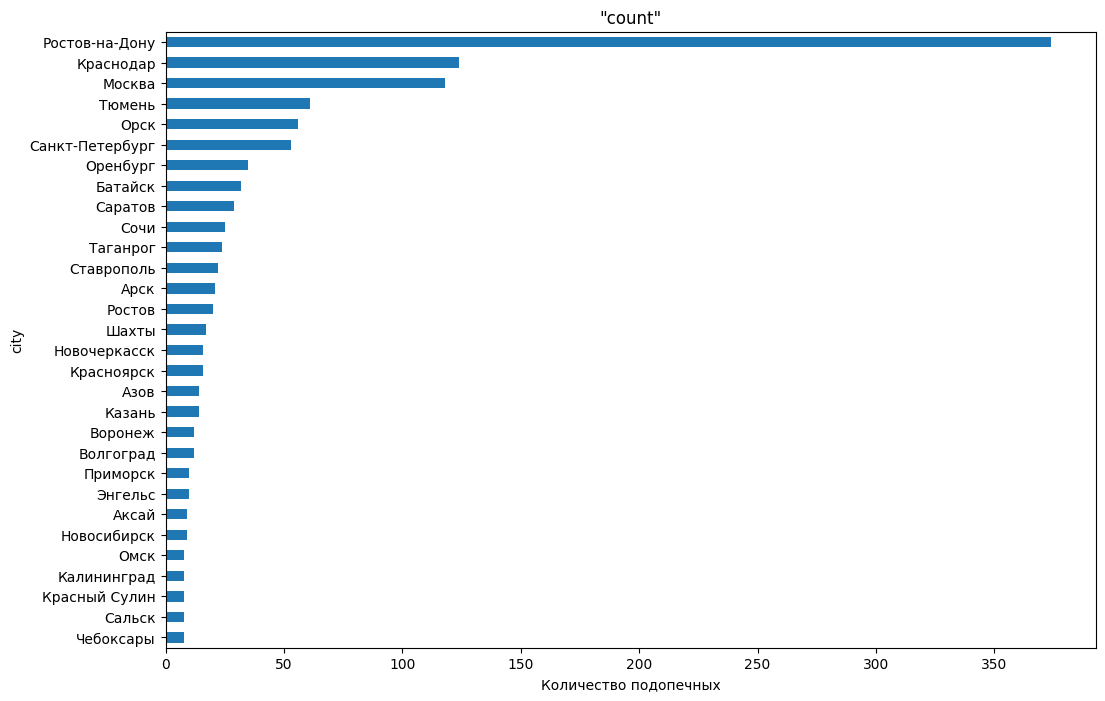

In [22]:
#смотрим по городам
graphics(top_city)

##Определяем локализацию

In [23]:
localization = pd.read_excel('https://docs.google.com/spreadsheets/d/1mau2qZiWrSJsyM-W8nAAS89MzU9G-545/export?format=xlsx', sheet_name='Локализация')
localization

,Локализация
0,Кожа (кроме меланомы)
1,Молочная железа
2,Кишечник
3,Предстательная железа
4,Тело матки
5,Легкое
6,Трахея
7,Бронхи
8,Анус
9,Почка


In [24]:
#создаем список по локализации
localization_list = localization['Локализация'].to_list()
localization_list

['Кожа (кроме меланомы)',
 'Молочная железа',
 'Кишечник',
 'Предстательная железа',
 'Тело матки',
 'Легкое',
 'Трахея',
 'Бронхи',
 'Анус',
 'Почка',
 'Желудок',
 'Мочевой пузырь',
 'Шейка матки',
 'Щитовидная железа',
 'Злокачественные лимфомы',
 'Меланома кожи',
 'Яичник',
 'Лейкемии',
 'Полость рта',
 'Гортань',
 'Поджелудочная железа',
 'Пищевод',
 'Соединительная и другие мягкие ткани',
 'Глотка',
 'Губа',
 'Ухо',
 'Печень и внутрипеченочные желчные протоки',
 'Желчный пузырь',
 'Кости и суставные хрящи',
 'Головной мозг',
 'Спинной мозг',
 'Слюнные железы',
 'Полость носа',
 'Женские половые органы (исключая матку и яичники)',
 'Мужские половые органы (исключая предстательную железу)',
 'Надпочечник',
 'Органы грудной клетки',
 'Без уточнения локализации',
 'РМЖ']

In [25]:
#смотрим как по факту указаны данные
df_participants['Диагноз'].unique()

array(['РМЖ, 1с стадия', 'Мальт лимфома желудка',
       'Рак шейки матки 3 С стадии',
       'РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад',
       'РМЖ, 2 а', 'РМЖ II стадия',
       'Канцераматоз плевры и множественные метастазы легких', 'РМЖ',
       'РМЖ, 2 стадия', 'РМЖ, 1 стадия', 'Рак почки, 3 ст',
       'Рак шейки матки', 'РМЖ,ещё не знаю жду уточнения стадии',
       'Болеет отец рак языка', 'Ршм3б', 'РМЖ 2 стадия',
       'Рак желудка 4 стадия', 'РМЖ 2ст', 'РМЖ 2 В люминальный',
       'Рак шейки матки 2b стадия,',
       'Болеет сестра рак яичников 3 стадия', 'Рак яичников 4 стадии',
       'Болеет мама предварительно РМЖ', 'Болеет мама рак яичника',
       'РШМ 2 В ст.', 'Рак тела,рак желудка с мтс 4 ст',
       'Рак почки стадия 4', 'РМЖ II ст.', 'Ршм 2ст',
       'Рак миндалины 2 стадия', 'РМЖ 2 стадия трипл',
       'Рак тимуса , 4 ст', 'Рабдомиосаркома, 3ст', 'РМЖ 2ст.', 'РМЖ 2',
       'РМЖ 2б', 'РМЖ 3 ст., РПК 2 ст., РЛМЖ 4 ст.', 'РМЖ 1 стадия',
       'РМ

In [26]:
df_participants[['localization', 'localization_score']] = df_participants['Диагноз'].apply(lambda x: process.extractOne(x, localization_list)).apply(pd.Series)
df_participants[['Диагноз', 'localization', 'localization_score']]

,Диагноз,localization,localization_score
0,"РМЖ, 1с стадия",РМЖ,90
1,Мальт лимфома желудка,Желудок,77
2,Рак шейки матки 3 С стадии,Тело матки,86
3,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяц...",Соединительная и другие мягкие ткани,86
4,"РМЖ, 2 а",РМЖ,90
...,...,...,...
1563,РМЖ 1 ст.,РМЖ,90
1564,Лимфома Ходжкина,Ухо,60
1565,РМЖ 2 В ст.,РМЖ,90
1566,РМЖ,РМЖ,100


In [27]:
#удаляем слова 'стаз', 'mts', 'мтс', 'рак', 'опухол', 'болеет'
values_to_check = ['стаз', 'mts', 'мтс']
full_values = ['рак', 'опухол', 'болеет']
pattern_1 = re.compile(rf'\b(?:{"|".join(map(re.escape, full_values))})[а-я]*\b\s*', re.IGNORECASE)
pattern_2 = re.compile(r'\b\w*(?:' + '|'.join(map(re.escape, values_to_check)) + r')\w*\b.*?(?:\s+\w+){0,3}\s*', re.IGNORECASE)

In [28]:
df_participants['name_localization'] = df_participants['Диагноз'].apply(lambda x: re.sub(pattern_1, '', x)).apply(lambda x: re.sub(pattern_2, '', x))
df_participants[['localization', 'localization_score']] = df_participants['name_localization'].apply(lambda x: process.extractOne(x, localization_list, scorer=fuzz.partial_ratio)).apply(pd.Series)
df_participants[['Диагноз', 'name_localization', 'localization', 'localization_score']].head()

,Диагноз,name_localization,localization,localization_score
0,"РМЖ, 1с стадия","РМЖ, 1с стадия",РМЖ,100
1,Мальт лимфома желудка,Мальт лимфома желудка,Желудок,86
2,Рак шейки матки 3 С стадии,шейки матки 3 С стадии,Шейка матки,91
3,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяц...","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяц...",РМЖ,100
4,"РМЖ, 2 а","РМЖ, 2 а",РМЖ,100


In [29]:
top_localization = df_participants['localization'].value_counts().head(20)
top_localization

localization
РМЖ                        1058
Яичник                       75
Желудок                      60
Шейка матки                  58
Легкое                       40
Ухо                          37
Кишечник                     35
Почка                        24
Трахея                       20
Меланома кожи                18
Щитовидная железа            18
Тело матки                   17
Глотка                       16
Анус                          9
Кожа (кроме меланомы)         7
Злокачественные лимфомы       7
Предстательная железа         6
Головной мозг                 5
Кости и суставные хрящи       5
Лейкемии                      5
Name: count, dtype: int64

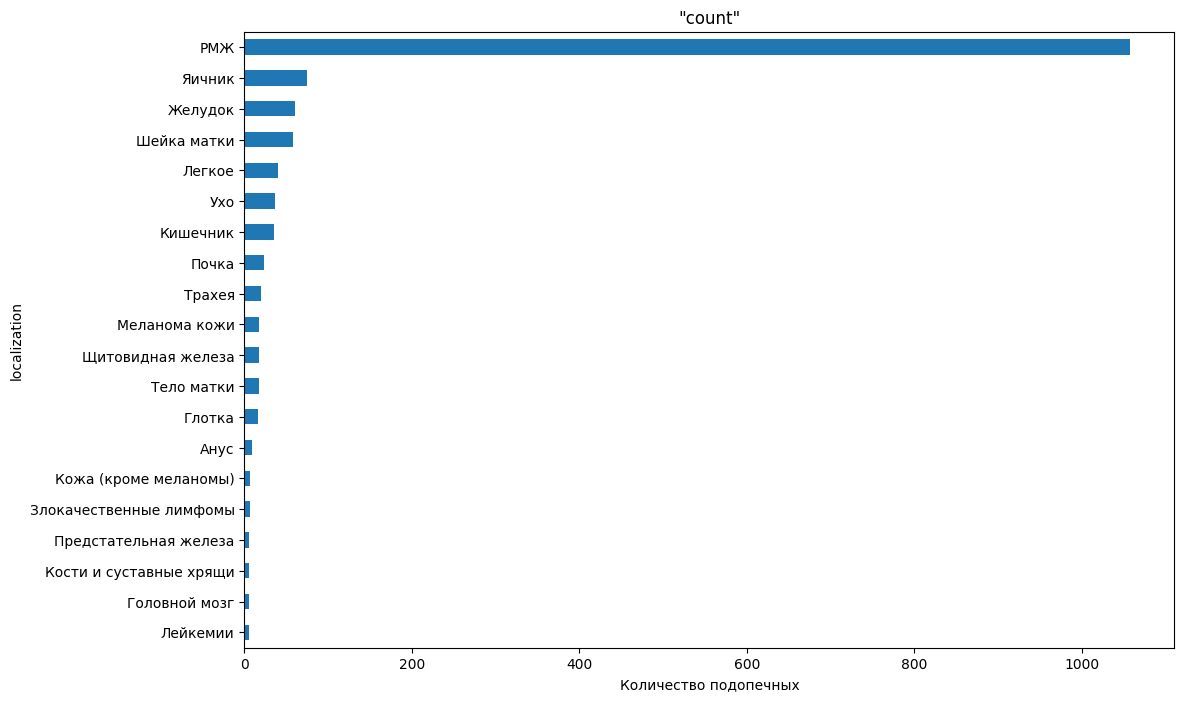

In [30]:
graphics(top_localization)

## Определяем стадию заболевания

In [31]:
#смотрим как уазаны стадии
df_participants['Диагноз'].unique()

array(['РМЖ, 1с стадия', 'Мальт лимфома желудка',
       'Рак шейки матки 3 С стадии',
       'РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад',
       'РМЖ, 2 а', 'РМЖ II стадия',
       'Канцераматоз плевры и множественные метастазы легких', 'РМЖ',
       'РМЖ, 2 стадия', 'РМЖ, 1 стадия', 'Рак почки, 3 ст',
       'Рак шейки матки', 'РМЖ,ещё не знаю жду уточнения стадии',
       'Болеет отец рак языка', 'Ршм3б', 'РМЖ 2 стадия',
       'Рак желудка 4 стадия', 'РМЖ 2ст', 'РМЖ 2 В люминальный',
       'Рак шейки матки 2b стадия,',
       'Болеет сестра рак яичников 3 стадия', 'Рак яичников 4 стадии',
       'Болеет мама предварительно РМЖ', 'Болеет мама рак яичника',
       'РШМ 2 В ст.', 'Рак тела,рак желудка с мтс 4 ст',
       'Рак почки стадия 4', 'РМЖ II ст.', 'Ршм 2ст',
       'Рак миндалины 2 стадия', 'РМЖ 2 стадия трипл',
       'Рак тимуса , 4 ст', 'Рабдомиосаркома, 3ст', 'РМЖ 2ст.', 'РМЖ 2',
       'РМЖ 2б', 'РМЖ 3 ст., РПК 2 ст., РЛМЖ 4 ст.', 'РМЖ 1 стадия',
       'РМ

In [32]:
#удаляем цифры 5 и 8, т.к. они указаны не в обозначении стадии
values_to_check = ['8']
full_values = ['5']
pattern_1 = re.compile(rf'\b(?:{"|".join(map(re.escape, full_values))})[а-я]*\b\s*', re.IGNORECASE)
pattern_2 = re.compile(r'\b\w*(?:' + '|'.join(map(re.escape, values_to_check)) + r')\w*\b.*?(?:\s+\w+){0,3}\s*', re.IGNORECASE)
df_participants['name_localization'] = df_participants['name_localization'].apply(lambda x: re.sub(pattern_1, '', x)).apply(lambda x: re.sub(pattern_2, '', x))

In [33]:
# Создадим регулярное выражение для поиска римских цифр от I до IV. Начинаем с 4, чтобы ее вообще можно было найти) Ищем сначала 4, а потом 1, которая повторяется от 1 до 3 раз
pattern_1 = re.compile(r'(IV|I{1,3})')

# Функция для замены римских цифр на арабские
def replace_roman(match):
    return str(roman.fromRoman(match.group(0)))

In [34]:
pattern_2 = re.compile(r'(\d)\s*(?:стадия|ст)\b|\b(?:стадия|ст)\s*(\d)|\b(\d)(\D+|$)|(?:t|т|ршм)\s*(\d)', re.IGNORECASE)

# Извлекаем цифры из каждой строки столбца
df_participants['grade'] = df_participants['name_localization'].apply(lambda x: re.sub(pattern_1, replace_roman, x))\
.apply(lambda x: re.search(pattern_2, x).group(1) or re.search(pattern_2, x).group(2) or re.search(pattern_2, x).group(3) or re.search(pattern_2, x).group(5) if re.search(pattern_2, x) else 'Не указана')

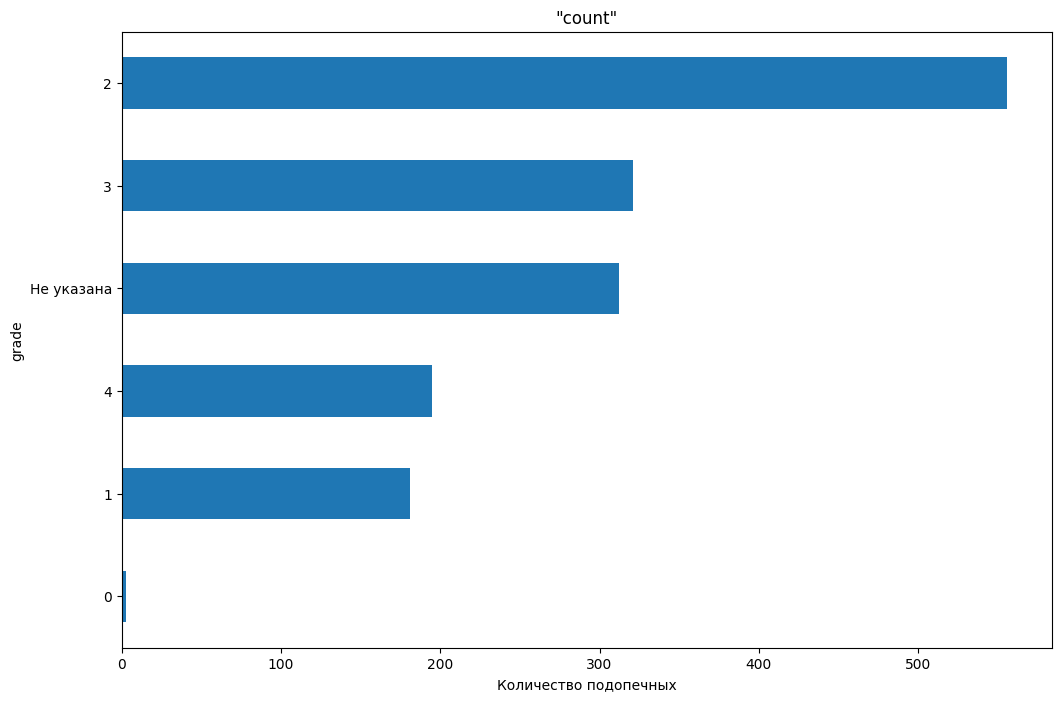

In [35]:
df_grade = df_participants['grade'].value_counts()
graphics(df_grade)

## Лицо, заполнявшее анкету

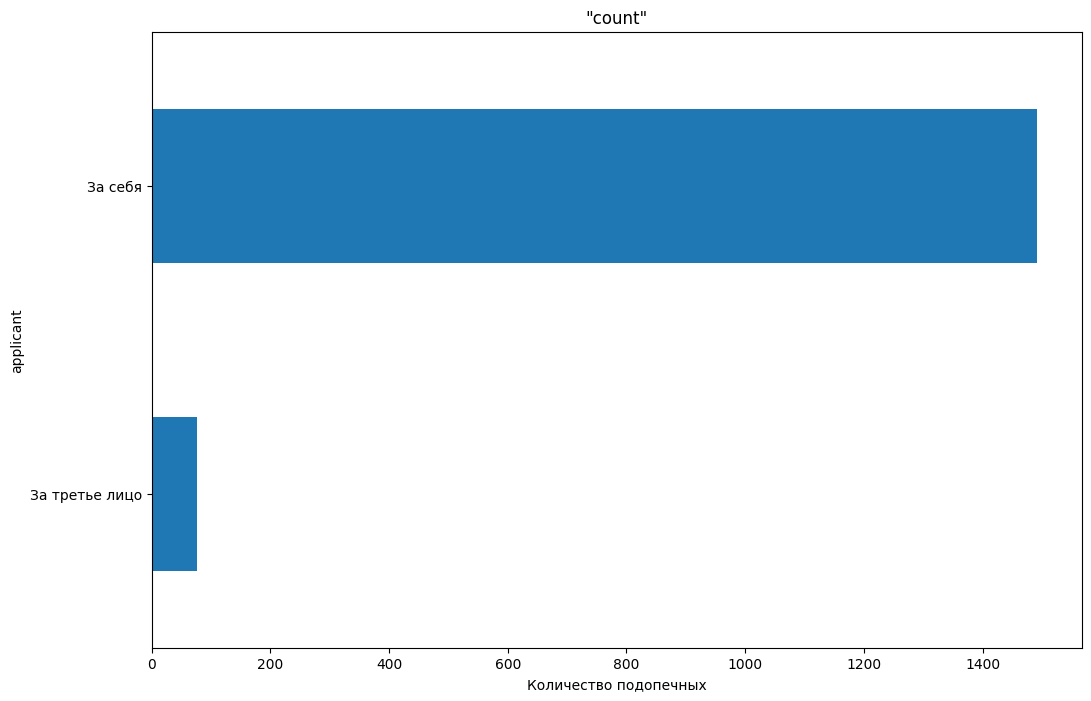

In [36]:
#формируем список 3 лиц
val_list = ['мама', 'мамы', 'муж', 'супруг', 'доче', 'дочь', 'дочки', 'отец', 'отца', 'папы', 'папа', 'друг', 'сын', 'тетя', 'тети', 'болеет', 'сын', 'внук', 'сестр', 'брат']
#проверяем вхождение подстроки из списка в строку с помощью функции pandas contains()
df_participants['applicant'] = df_participants['Диагноз'].apply(lambda x: 'За третье лицо' if any(val in x or pd.Series(x).str.contains(val, regex=True, case=False).any() for val in val_list) else 'За себя')
#визуализируем за кого заполняли подопечные
graphics(df_participants['applicant'].value_counts())

## Вид помощи

In [37]:
help = pd.read_excel('https://docs.google.com/spreadsheets/d/1mau2qZiWrSJsyM-W8nAAS89MzU9G-545/export?format=xlsx', sheet_name='Сфера деятельности')
help_list = help['Сфера деятельности пациента']
help_list

0                      IT, компьютеры, интернет
1     Администрация, руководство среднего звена
2                            Бухгалтерия, аудит
3         Гостинично-ресторанный бизнес, туризм
4        Государственная и муниципальная служба
5                            Дизайн, творчество
6                      Инженерные специальности
7                        Красота, фитнес, спорт
8                  Культура, музыка, шоу-бизнес
9                         Логистика, склад, ВЭД
10                       Маркетинг, реклама, PR
11                       Медицина, фармацевтика
12                                 Недвижимость
13                           Образование, наука
14                         Охрана, безопасность
15                             Продажи, закупки
16          Рабочие специальности, производство
17                           Розничная торговля
18           Секретариат, делопроизводство, АХО
19     Сельское хозяйство, агробизнес, животные
20                СМИ, издательство, пол

In [38]:
#смотрим какие виды помощи указаны
df_participants['Помощь'].value_counts().head(60)

Помощь
Не указано                                                                      788
Психологическую                                                                  48
Общение                                                                          22
Психологическая                                                                  20
Информационную                                                                   18
Любую                                                                            13
Информация                                                                       12
Поддержку                                                                        12
Информационная                                                                    9
Психологическая поддержка                                                         9
Моральную                                                                         8
Консультация                                                         

In [39]:
#словарь
help_dictionary = {
    'Не указано': ['Не указано', '-', 'не зна'],
    'Медицинская': ['обследов', 'лечен', 'реабилитац'],
    'Материальная' : ['денеж', 'материал', 'подар', 'такси', 'оплат', 'гуманитар', 'стоит', 'трансфер', 'прожив', 'дорог', 'медикаме', 'реконструк', 'финанс', 'получи', 'терапи', 'жиль', 'бель', 'протез', 'рукав', 'билет', 'бюст', '300'],
    'Юридическая' : ['юридич', 'юрист', 'инвалиднос'],
    'Психологическая' : ['психол', 'эмоц', 'тревож', 'общен', 'морал', 'досуг', 'общат', 'страх', 'страш', 'говор', 'позитив', 'поддерж', 'реабилит', 'разобрат', 'переключит'],
    'Информационная' : ['консульт', 'инфо', 'совет', 'маршрут', 'обмен опыт', 'где', 'ормац', 'рекомендац', 'медицин', 'как ', 'что', 'мнени', 'вариант', 'новост', 'узна', 'знан', 'вопрос', 'врач', 'доктор', 'когда', 'можно', 'контакт', 'грамот', 'найти', 'про ', 'лимфо', 'эндокрин'],
    'Участие в мероприятиях': ['мероприят', 'очны', 'очно', 'встреч', 'нейрограф', 'йог', 'бассейн', 'танц', 'стилист', 'фото'],
    'Любая' : ['любая', 'любую', 'всесторон', 'всяк', 'любой', 'разн', 'всю', 'по желан']
    }
#добавляем новый столбец 'help' с использованием map и apply
df_participants['help'] = df_participants['Помощь'].apply(lambda x: next((key for key, values in help_dictionary.items() if any(pd.Series(x).astype(str).str.contains(value, regex=True, case=False).any() for value in (values))), 'Другая'))

In [40]:
df_participants['help'].value_counts()

help
Не указано                817
Психологическая           348
Информационная            172
Медицинская                91
Материальная               45
Любая                      34
Другая                     27
Юридическая                22
Участие в мероприятиях     12
Name: count, dtype: int64

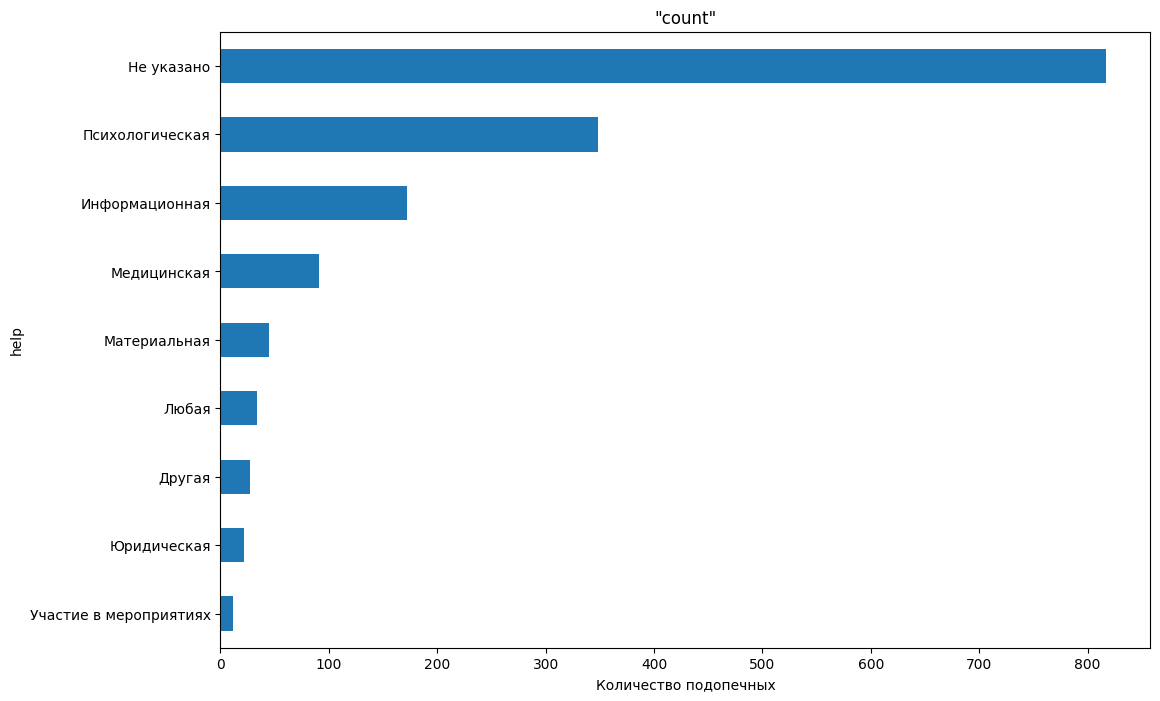

In [41]:
graphics(df_participants['help'].value_counts())

## Сфера деятельности подопечных

In [42]:
area = pd.read_excel('https://docs.google.com/spreadsheets/d/1mau2qZiWrSJsyM-W8nAAS89MzU9G-545/export?format=xlsx', sheet_name='Сфера деятельности')
areas = area['Сфера деятельности пациента'].to_list()
area_df = df_participants['Сфера деятельности'].str.lower().to_frame().copy()

In [43]:
#смотрим какой результат выводит неточный поиск
area_df[['area', 'area_score']] = area_df['Сфера деятельности'].apply(lambda x: process.extractOne(x, areas)).apply(pd.Series)
display(area_df[['area', 'area_score']])
display(area_df['area'].value_counts())

,area,area_score
0,"Бухгалтерия, аудит",90
1,"Медицина, фармацевтика",90
2,На пенсии,57
3,"Медицина, фармацевтика",90
4,"Топ-менеджмент, руководство высшего звена",52
...,...,...
1563,Инженерные специальности,55
1564,"Администрация, руководство среднего звена",58
1565,"Дизайн, творчество",68
1566,"Учащийся, студент",90


area
Образование, наука                           220
На пенсии                                    118
Бухгалтерия, аудит                           112
Сельское хозяйство, агробизнес, животные     105
Не работаю                                    94
Администрация, руководство среднего звена     83
Предприниматель, самозанятый                  69
Строительство, архитектура                    66
Продажи, закупки                              57
Дизайн, творчество                            55
СМИ, издательство, полиграфия                 47
Топ-менеджмент, руководство высшего звена     41
Государственная и муниципальная служба        41
Медицина, фармацевтика                        40
Розничная торговля                            34
Логистика, склад, ВЭД                         34
Инженерные специальности                      33
Гостинично-ресторанный бизнес, туризм         33
Управление персоналом                         33
Юриспруденция                                 30
Страхование    

In [44]:
#смотрим как указаны сферы деятельности в анкете
df_participants['Сфера деятельности'].value_counts().head(60)

Сфера деятельности
Не указано              191
Домохозяйка              82
Бухгалтер                71
Пенсионер                69
Не работаю               31
Учитель                  29
Экономист                23
Продавец                 23
Врач                     23
Менеджер                 19
Юрист                    19
Пенсионерка              19
Торговля                 17
Медсестра                16
Воспитатель              14
Парикмахер               14
Педагог                  14
Инженер                  14
Психолог                 12
Образование              12
Медицина                 11
домохозяйка              11
Бухгалтерия              10
Безработная              10
Преподаватель            10
Продажи                   9
Швея                      9
ИП                        9
пенсионер                 8
Дизайнер                  8
Специалист                8
Фотограф                  7
Предприниматель           7
Финансы                   7
пенсионерка               6
М

In [45]:
#словарь
area_dictionary  = {'IT, компьютеры, интернет': ['it', 'ит ', 'веб', 'web', 'програм', 'аналитик'],
 'Администрация, руководство среднего звена': ['инспект', 'администр', 'начальник'],
 'Бухгалтерия, аудит': ['бухгалтер', 'экономи', 'галтер', 'бух', 'учет', 'ревиз'],
 'Гостинично-ресторанный бизнес, туризм': ['тури', 'гид', 'гостин', 'пекар', 'кофе', 'кафе', 'ресторан', 'официан',
  'общепит',  'кулинар', 'повар', 'кондит', 'пище', 'питани', 'десерт', 'пряни', 'сыровар'],
 'Государственная и муниципальная служба': ['служа', 'воен', 'министе', 'гос', 'служб', 'полиц', 'чинов', 'войск', 'воин', 'госслужб'],
 'Дизайн, творчество': ['дизайн', 'видео', 'design', 'графи', 'украш', 'иллюстр', 'худож', 'вязан', 'организ', 'творч', 'вяжу', 'фото'],
 'Инженерные специальности': ['конструкт', 'инженер', 'проектир'],
 'Красота, фитнес, спорт': ['красот', 'тренер', 'космет', 'шугар', 'массаж', 'макия', 'стил', 'визаж', 'ресниц', 'волос', 'бьюти', 'перманент', 'маник', 'парик', 'ногт', 'педикю', 'мейк', 'брови',
  'спорт', 'тренаж', 'йог', 'депил'],
 'Культура, музыка, шоу-бизнес': ['культур',  'певч', 'пою', 'мод', 'блог', 'развле', 'ивент', 'режиссер', 'музыка'],
 'Логистика, склад, ВЭД': ['вэд', 'внешнеэк', 'логист', 'клад'],
 'Маркетинг, реклама, PR': ['маркет', 'pr', 'реклам'],
 'Медицина, фармацевтика': ['медиц', 'медсестра', 'здравоох', 'терап',
  'фельдшер', 'акуш', 'врач', 'доктор', 'фармац', 'подолог', 'стоматол', 'педиат', 'иатр',
  'мед', 'санитар', 'провизор', 'м/с', 'мед.'],
 'На пенсии': ['пенси', 'бабуш'],
 'Не работаю': ['неработ', 'безработ', 'не работ', 'многодет', 'декрет', 'отпуск', 'без работ', '-', '---', '_', 'не указ',
  'дома', 'домо', 'инвалид', 'безробот', 'д/х', 'нет'],
 'Недвижимость': ['риэлт', 'недвиж', 'оценщик'],
 'Образование, наука': ['образов', 'школ', 'логоп', 'дефект',
  'педагог', 'учит', 'воспит', 'методи', 'детск', 'детьми',
  'библиотек', 'препод', 'репетит', 'обучен'],
 'Охрана, безопасность': ['охранн', 'охрана', 'безопас'],
 'Предприниматель, самозанятый': ['предприн', 'avon', 'сетев', 'фриланс', 'оконный бизнес', 'индив', 'самоз', 'ип'],
 'Продажи, закупки': ['продаж', 'закуп','представит', 'снабжен'],
 'Рабочие специальности, производство': ['оператор', 'дезинфек', 'газ', 'техник',  'механик', 'столяр', 'лабора',
  'энергет', 'машиностроит', 'промыш', 'укладчик', 'ремонт', 'производство', 'кузнец', 'техни', 'отделка', 'геммолог', 'технол'],
 'Розничная торговля': ['торгов', 'розни','опто', 'таворовед', 'кассир', 'товаровед', 'магазин', 'продове', 'продав'],
 'СМИ, издательство, полиграфия': ['филолог', 'текст', 'лингв', 'писат', 'полиграфия', 'журнал'],
 'Секретариат, делопроизводство, АХО': ['1с', 'менедж',  'архив', 'секретар', 'офис', 'делопроиз', 'хозяйствен'],
 'Сельское хозяйство, агробизнес, животные': ['ферм', 'хозяйство', 'сельск', 'животн', 'ветерин', 'зоо', 'грум', 'птиц', 'биолог', 'эколог', 'заводчик', 'растиниевод', 'садовод'],
 'Страхование': ['страхов'],
 'Строительство, архитектура, ЖКХ': ['строител',  'жкх', 'архит'],
 'Сфера обслуживания': ['переводчик', 'консульт', 'консалтинг', 'водит', 'коуч',
  'швея', 'швей', 'крой', 'ателье', 'обслуж', 'услуг', 'чист', 'колл',
  'сантех', 'психо', 'бизнес тренер', 'соц', 'флорист', 'уборщ'],
 'Телекоммуникации и связь': ['диспетч', 'коммуника', 'телеком', 'связ', 'телефон', 'коммуналь'],
 'Топ-менеджмент, руководство высшего звена': ['управленец', 'руковод', 'владе', 'директ'],
 'Транспорт, автобизнес': ['азс', 'аэропорт', 'машинист', 'жд', 'дорог', 'дорож', 'транспорт', 'авто', 'кондуктор', 'авиа'],
 'Управление персоналом': ['кадр', 'hr', 'рекрут'],
 'Учащийся, студент': ['студент', 'учусь', 'учащ'],
 'Финансы, банки': ['фин', 'банк'],
 'Юриспруденция': ['юри', 'адвок']}

In [46]:
#добавляем столбец
df_participants['area'] = df_participants['Помощь'].apply(lambda x: next((key for key, values in area_dictionary.items() if any(pd.Series(x).astype(str).str.contains(value, regex=True, case=False).any() for value in (values))), 'Другая сфера'))

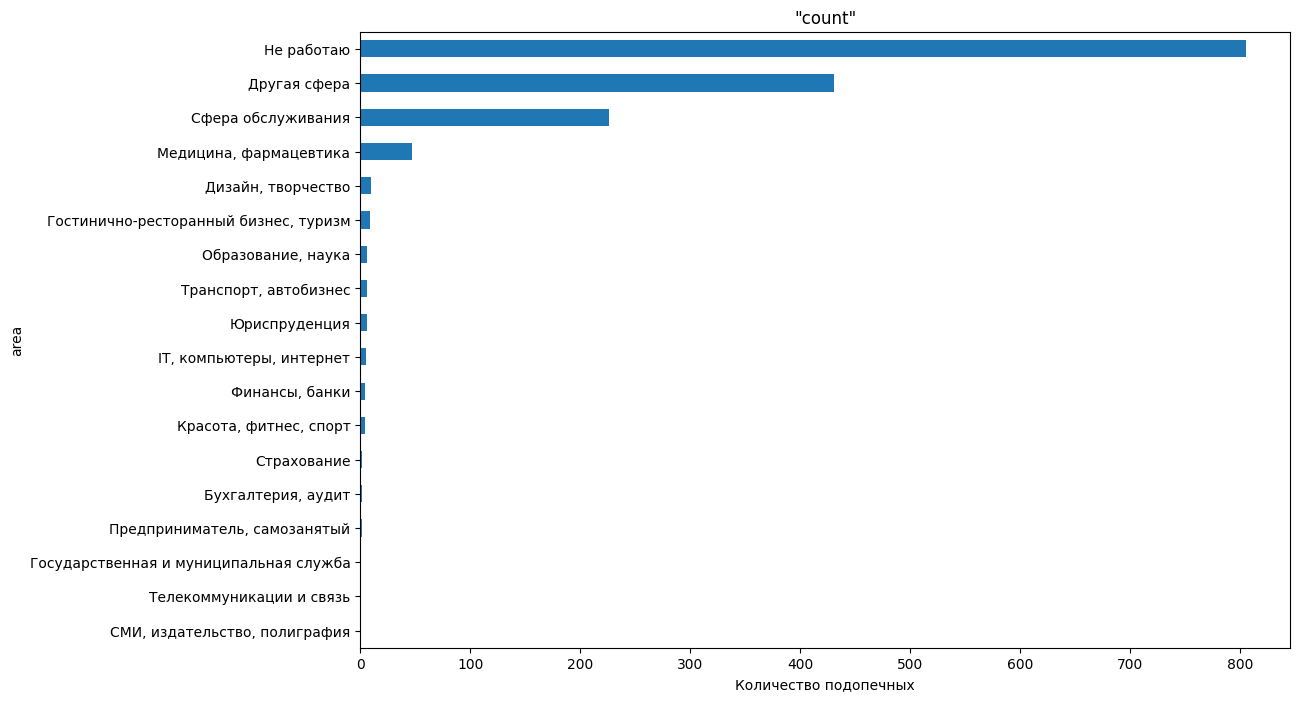

In [47]:
graphics(df_participants['area'].value_counts())

## Откуда узнали

In [48]:
find_out = pd.read_excel('https://docs.google.com/spreadsheets/d/1mau2qZiWrSJsyM-W8nAAS89MzU9G-545/export?format=xlsx', sheet_name='Как узнали')
find_out

,Как вы узнали о нашей организации?
0,Интернет
1,Знакомые
2,Объявление в мед.учреждении
3,Другое


In [49]:
#формируем список
find_out_list = find_out['Как вы узнали о нашей организации?'].to_list()
find_out_list

['Интернет', 'Знакомые', 'Объявление в мед.учреждении', 'Другое']

In [50]:
#смотрим фактические данные
df_participants['Как у знали'].value_counts()

Как у знали
Знакомые                       763
Интернет                       623
Объявление в мед.учреждении     74
Свой вариант                    54
Не указано                      48
Интренет                         4
из группы Здравствуй             1
Маммофорум в Питере              1
Name: count, dtype: int64

In [51]:
#словарь
find_out_dictionary = {
    'Интернет': ['Интернет', 'Интренет'],
    'Знакомые': ['Знакомые'],
    'Объявление в мед.учреждении' : ['Объявление в мед.учреждении'],
}
#добавляем новый столбец 'find_out'
df_participants['find_out'] = df_participants['Как у знали'].apply(lambda x: next((key for key, values in find_out_dictionary.items() if any(pd.Series(x).astype(str).str.contains(value, regex=True, case=False).any() for value in (values))), 'Другое'))
df_participants['find_out'].value_counts()

find_out
Знакомые                       763
Интернет                       627
Другое                         104
Объявление в мед.учреждении     74
Name: count, dtype: int64

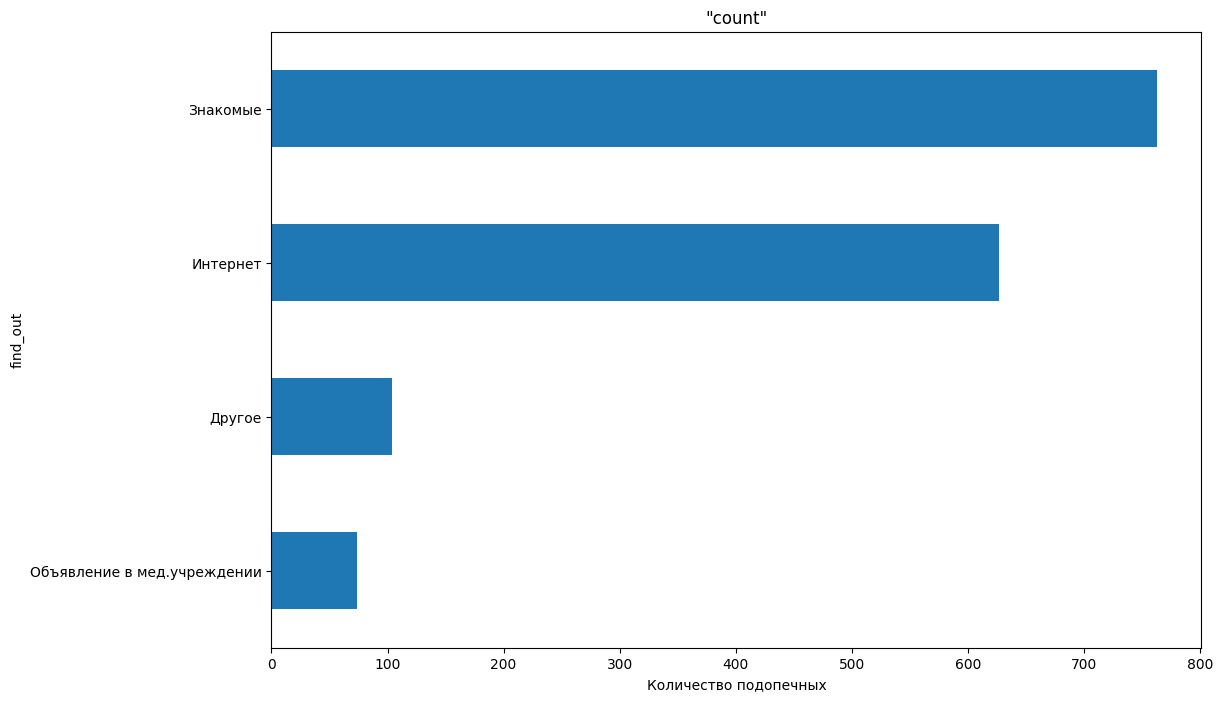

In [52]:
graphics(df_participants['find_out'].value_counts())

## Определяем год рождения

In [53]:
df_participants.loc[df_participants['Дата рождения'] == 'Не указано', 'Дата рождения'] = ''
df_participants['Дата рождения'].value_counts().head(3)

Дата рождения
                       75
1979-05-11 00:00:00     4
1979-04-25 00:00:00     3
Name: count, dtype: int64

In [54]:
df_participants['Дата рождения'] = pd.to_datetime(df_participants['Дата рождения'], format='%Y-%m-%d')

In [55]:
df_participants['year_birth'] = df_participants['Дата рождения'].dt.year
df_participants['month_birth'] = df_participants['Дата рождения'].dt.month
df_participants['day_birth'] = df_participants['Дата рождения'].dt.day
df_participants['age'] = 2024 - df_participants['year_birth']
df_participants['age'].value_counts().head(60)

age
44.0    71
50.0    70
48.0    69
46.0    67
47.0    64
43.0    58
42.0    58
49.0    58
51.0    58
45.0    57
41.0    57
40.0    56
54.0    54
38.0    51
37.0    48
52.0    47
39.0    45
53.0    40
56.0    38
55.0    35
57.0    29
35.0    27
36.0    26
58.0    23
62.0    22
34.0    21
59.0    21
64.0    21
60.0    21
61.0    18
63.0    15
30.0    13
65.0    12
66.0    12
33.0    12
32.0    10
67.0    10
31.0     9
68.0     9
71.0     7
69.0     5
27.0     5
29.0     4
72.0     4
70.0     4
28.0     3
73.0     3
75.0     3
3.0      3
26.0     3
24.0     2
78.0     2
83.0     1
21.0     1
74.0     1
76.0     1
81.0     1
1.0      1
77.0     1
79.0     1
Name: count, dtype: int64

# Доноры

## Тип платежа

In [56]:
#напишем функцию, чтобы посмотреть информацию по пожертвованиям доноров
def donors_info(row):
    display(pd.pivot_table(df_donors, aggfunc = 'count', index = row, values = 'ID пожертвования').sort_values(by='ID пожертвования', ascending=False).reset_index())
    row.value_counts().sort_values().plot(kind='barh', title =f'"{row.name}"', xlabel="Количество пожертвований доноров", figsize=(6, 4))

In [57]:
def pie_type(row):
    fig = go.Figure(data=[go.Pie(labels=row, # указываем значения, которые появятся на метках сегментов
                             values=df_donors['ID пожертвования'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title=f'"{row.name}"', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Количество пожертвований',
                                    showarrow=False)])
    fig.show() # выводим график

,Тип платежа,ID пожертвования
0,Разовое,227
1,Все рекуррентные платежи,218
2,Рекуррентные подписки,136


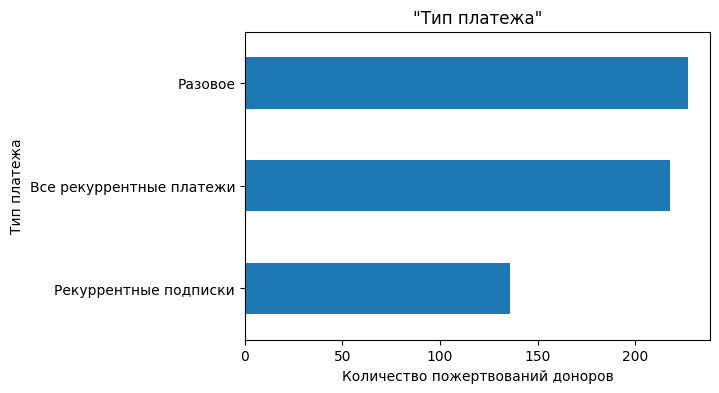

In [58]:
donors_info(df_donors['Тип платежа'])

In [59]:
pie_type(df_donors['Тип платежа'])

-------
-------
Наибольшую долю пожертвований составляют рекуррентные платежи. Доля разовых платежей на 2,3% меньше доли рекуррентных. Наименьшая доля выпадает на рекуррентные подписки.
_____
_____


## Платежный оператор

,Плат. оператор,ID пожертвования
0,CloudPayments,572
1,ЮKassa,4
2,Квитанции,3
3,MIXPLAT,1
4,Текстовое сообщение,1


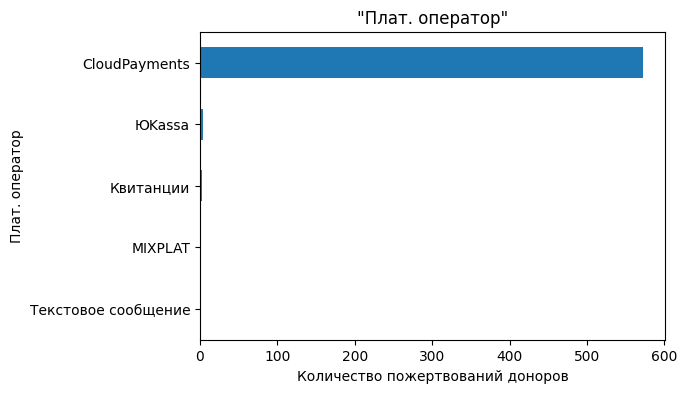

In [60]:
donors_info(df_donors['Плат. оператор'])

In [61]:
pie_type(df_donors['Плат. оператор'])

_____
_____
Основная доля пожертвований осуществлена платежным оператором CloudPayments (99%). По остальным операторам доля пожертвований меньше 1 %
_____
_____

## Способы платежа

,Способ платежа,ID пожертвования
0,Банковская карта,574
1,Банковская платёжная квитанция,3
2,ЮMoney,2
3,Дополнительные способы,1
4,Платежи с помощью SMS,1


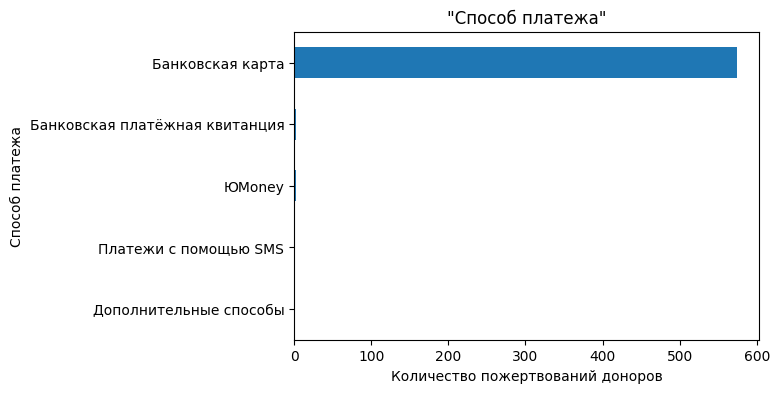

In [62]:
donors_info(df_donors['Способ платежа'])

In [63]:
pie_type(df_donors['Способ платежа'])

--------
--------
Основная доля пожертвований осуществлена банковскими картами (99%). По сотальным способам платежей доля меньше 1%. Однаком самым непопулярным способ является платежи с помощью SMS.
-------
------


## Динамика платежей

In [64]:
df_donors.dtypes

ID пожертвования                 int64
ID донора                       object
Тип платежа                     object
Плат. оператор                  object
Способ платежа                  object
Полная сумма                     int64
Дата пожертвования              object
Статус                          object
Подписка на рассылку            object
Date                    datetime64[ns]
dtype: object

In [65]:
df_donors['year'] = df_donors['Date '].dt.year
df_donors['month'] = df_donors['Date '].dt.month
df_donors['day'] = df_donors['Date '].dt.day
df_donors.head(2)

,ID пожертвования,ID донора,Тип платежа,Плат. оператор,Способ платежа,Полная сумма,Дата пожертвования,Статус,Подписка на рассылку,Date,year,month,day
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:15",Оплачено,Нет,2024-01-15,2024,1,15
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:10",Попытка пожертвовать,Нет,2024-01-15,2024,1,15


In [66]:
payments_year = pd.pivot_table(df_donors, aggfunc = 'count', index = 'year', values = 'ID пожертвования').reset_index()
payments_year

,year,ID пожертвования
0,2022,125
1,2023,434
2,2024,22


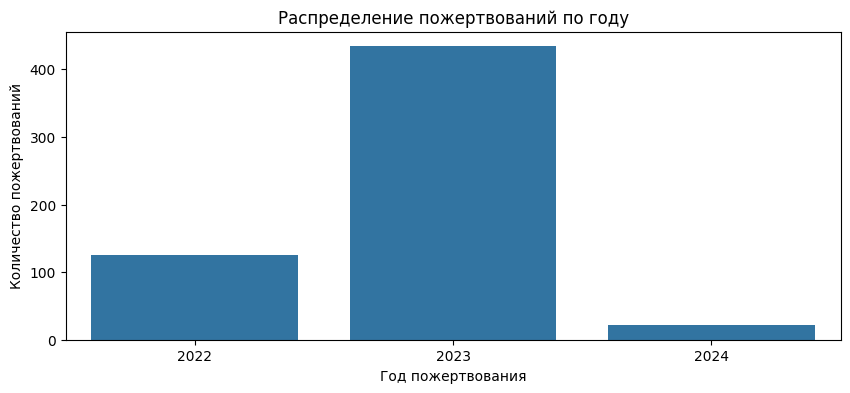

In [67]:
ax = sns.barplot(x='year',
            y='ID пожертвования',
            data=payments_year
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по году')
ax.set(xlabel='Год пожертвования', ylabel='Количество пожертвований');

In [68]:
payments_month = pd.pivot_table(df_donors, aggfunc = 'count', index = 'month', values = 'ID пожертвования').reset_index()
payments_month

,month,ID пожертвования
0,1,45
1,2,25
2,3,45
3,4,64
4,5,70
5,6,32
6,7,33
7,8,50
8,9,25
9,10,72


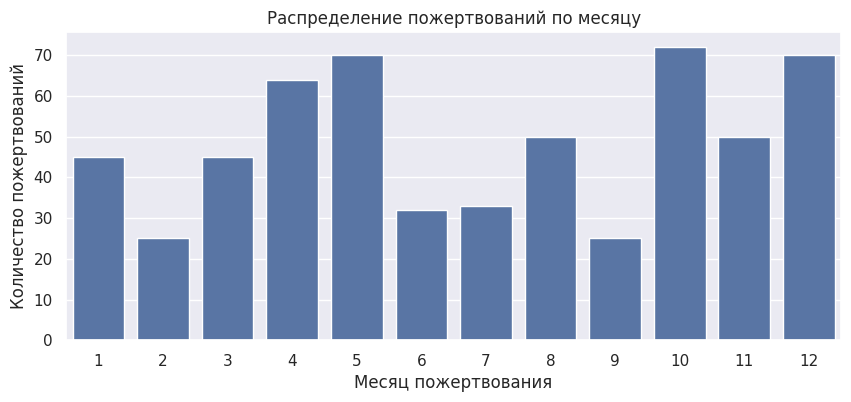

In [69]:
ax = sns.barplot(x='month',
            y='ID пожертвования',
            data=payments_month
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по месяцу')
ax.set(xlabel='Месяц пожертвования', ylabel='Количество пожертвований');

In [70]:
df_2022 = df_donors[df_donors['year'] == 2022]
payments_month_2022 = pd.pivot_table(df_2022, aggfunc = 'count', index = 'month', values = 'ID пожертвования').reset_index()
payments_month_2022

,month,ID пожертвования
0,2,9
1,3,3
2,4,6
3,5,18
4,6,6
5,7,12
6,8,14
7,9,5
8,10,6
9,11,6


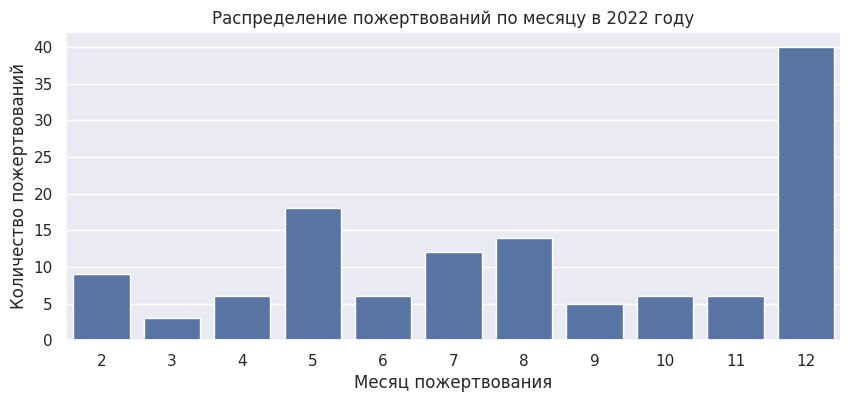

In [71]:
ax = sns.barplot(x='month',
            y='ID пожертвования',
            data=payments_month_2022
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по месяцу в 2022 году')
ax.set(xlabel='Месяц пожертвования', ylabel='Количество пожертвований');

In [72]:
df_2023 = df_donors[df_donors['year'] == 2023]
payments_month_2023 = pd.pivot_table(df_2023, aggfunc = 'count', index = 'month', values = 'ID пожертвования').reset_index()
payments_month_2023

,month,ID пожертвования
0,1,23
1,2,16
2,3,42
3,4,58
4,5,52
5,6,26
6,7,21
7,8,36
8,9,20
9,10,66


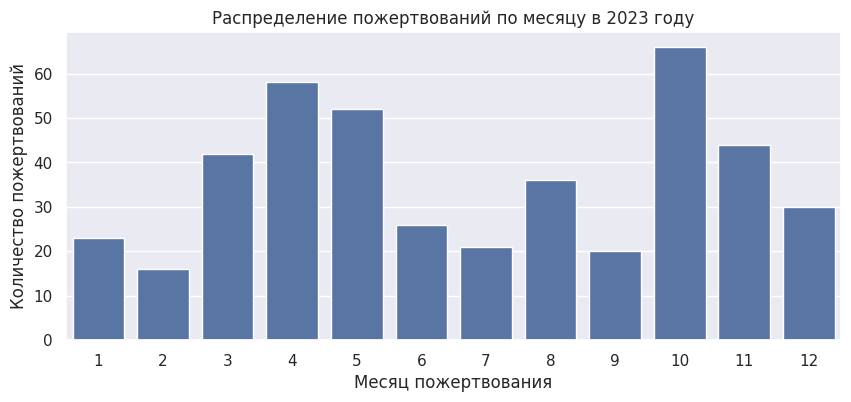

In [73]:
ax = sns.barplot(x='month',
            y='ID пожертвования',
            data=payments_month_2023
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по месяцу в 2023 году')
ax.set(xlabel='Месяц пожертвования', ylabel='Количество пожертвований');

In [74]:
payments_day = pd.pivot_table(df_donors, aggfunc = 'count', index = 'day', values = 'ID пожертвования').reset_index()
payments_day

,day,ID пожертвования
0,1,10
1,2,46
2,3,20
3,4,23
4,5,35
5,6,14
6,7,12
7,8,13
8,9,15
9,10,6


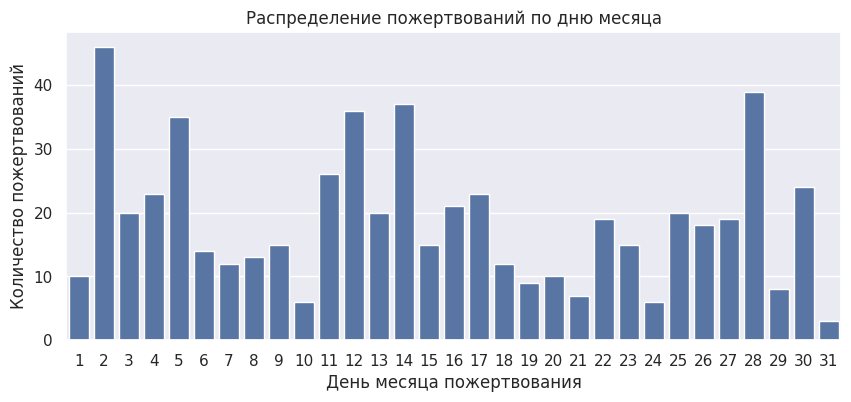

In [75]:
ax = sns.barplot(x='day',
            y='ID пожертвования',
            data=payments_day
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по дню месяца')
ax.set(xlabel='День месяца пожертвования', ylabel='Количество пожертвований');

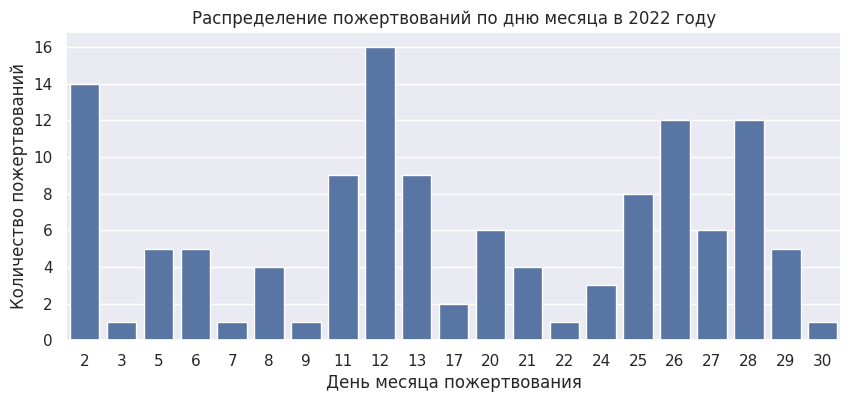

In [76]:
payments_day_2022 = pd.pivot_table(df_2022, aggfunc = 'count', index = 'day', values = 'ID пожертвования').reset_index()

ax = sns.barplot(x='day',
            y='ID пожертвования',
            data=payments_day_2022
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по дню месяца в 2022 году')
ax.set(xlabel='День месяца пожертвования', ylabel='Количество пожертвований');

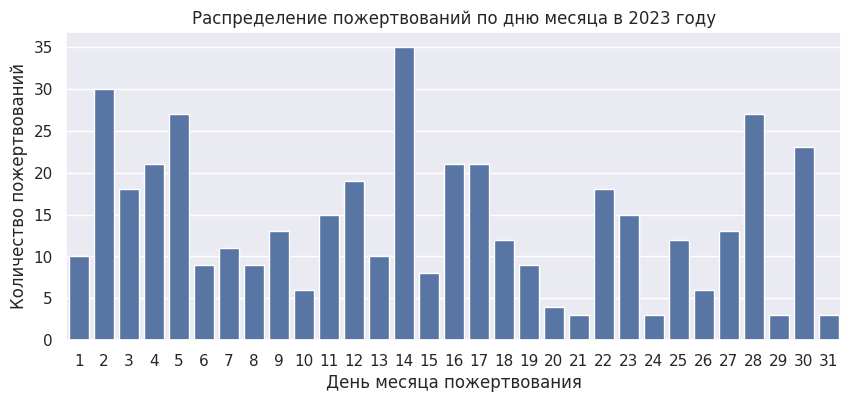

In [77]:
payments_day_2023 = pd.pivot_table(df_2023, aggfunc = 'count', index = 'day', values = 'ID пожертвования').reset_index()

ax = sns.barplot(x='day',
            y='ID пожертвования',
            data=payments_day_2023
)

plt.gcf().set_size_inches(10,4)
sns.set(font_scale=1)
ax.set_title('Распределение пожертвований по дню месяца в 2023 году')
ax.set(xlabel='День месяца пожертвования', ylabel='Количество пожертвований');

-------
-------
- Больше всего пожертвований осуществлено в 2023 году, в 3,5 раза больше, чем в 2022 году.
- Больше всего пожертвований осуществляется в апреле, мае, октябре, декабре. В 2022 году больше всего пожертвований осуществлено в декабре, в 2023 году - в апреле, мае, октябре.
- Чаще всего, пожертвования осуществляются на 2 день месяца. В 2022 году самым популярным днем осуществления пожертвований является 12 число, а в 2023 году - 14 число.
------
----


## Статусы

,Статус,ID пожертвования
0,Оплачено,433
1,Попытка пожертвовать,108
2,Платёж завершён с ошибкой,40


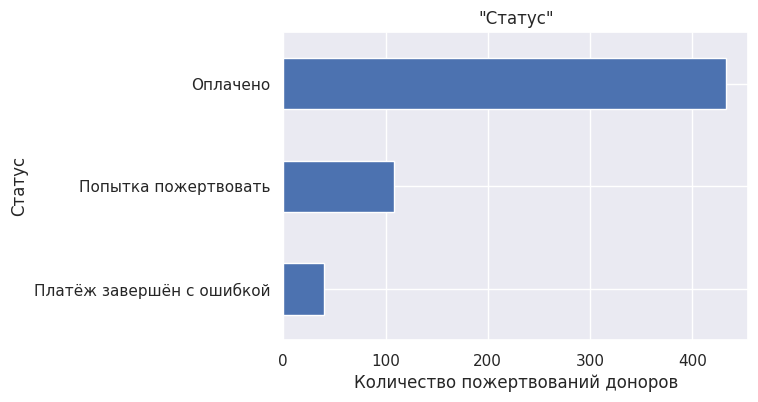

In [78]:
donors_info(df_donors['Статус'])

In [79]:
pie_type(df_donors['Статус'])

,Тип платежа,ID пожертвования
0,Разовое,63
1,Рекуррентные подписки,45


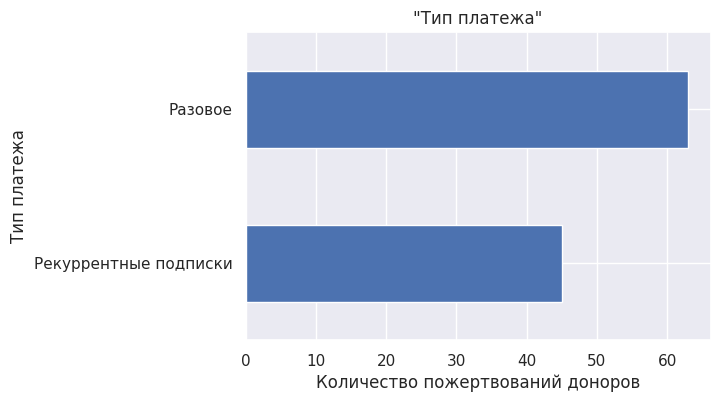

In [80]:
#проверяем платежи со статусом попытки пожертвовать
df_attempt = df_donors[df_donors['Статус'] == 'Попытка пожертвовать']
donors_info(df_attempt['Тип платежа'])
pie_type(df_attempt['Тип платежа'])

,Плат. оператор,ID пожертвования
0,CloudPayments,103
1,ЮKassa,3
2,Квитанции,2


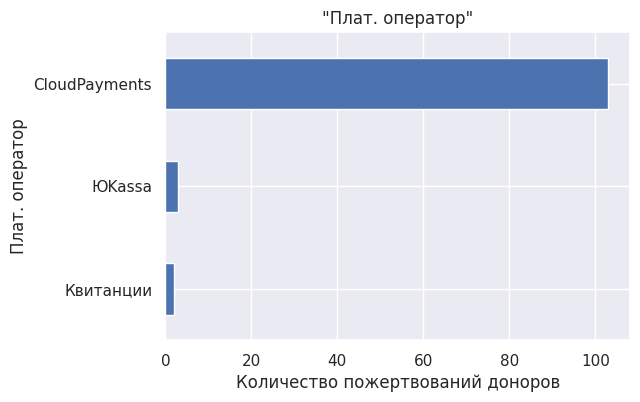

In [81]:
donors_info(df_attempt['Плат. оператор'])
pie_type(df_attempt['Плат. оператор'])

,Способ платежа,ID пожертвования
0,Банковская карта,105
1,Банковская платёжная квитанция,2
2,ЮMoney,1


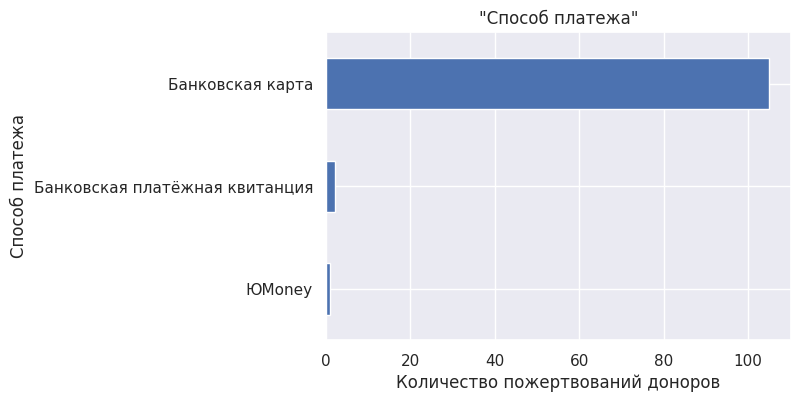

In [82]:
donors_info(df_attempt['Способ платежа'])
pie_type(df_attempt['Способ платежа'])

,Тип платежа,ID пожертвования
0,Все рекуррентные платежи,30
1,Разовое,6
2,Рекуррентные подписки,4


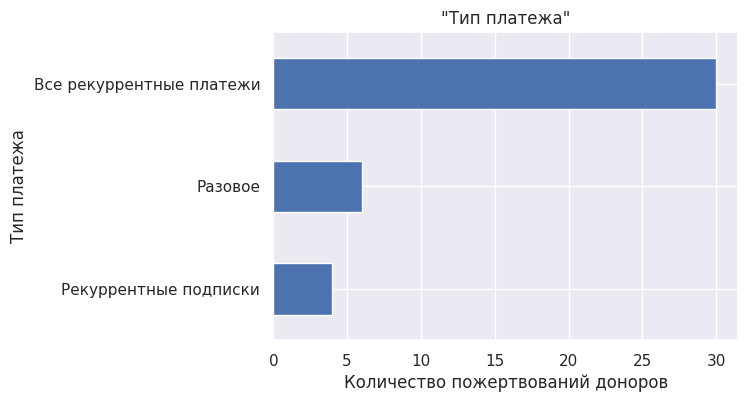

In [83]:
#проверяем платежи со статусом "Платеж совершен с ошибкой"
df_error = df_donors[df_donors['Статус'] == 'Платёж завершён с ошибкой']
donors_info(df_error['Тип платежа'])
pie_type(df_error['Тип платежа'])

,Плат. оператор,ID пожертвования
0,CloudPayments,40


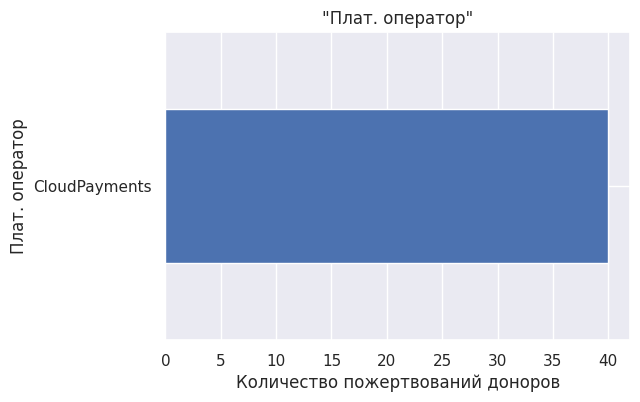

In [84]:
donors_info(df_error['Плат. оператор'])
pie_type(df_error['Плат. оператор'])

,Способ платежа,ID пожертвования
0,Банковская карта,40


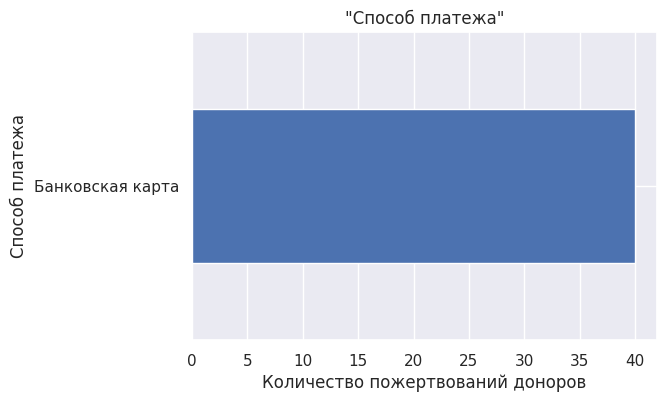

In [85]:
donors_info(df_error['Способ платежа'])
pie_type(df_error['Способ платежа'])

------
------
Больше всего платежей со статусом оплачен. Доля попыток пожертвовать (18,6%) значительное и лучше проверить в разрезе способа платежа, платежного оператора, типа платежа.

- По попыткам пожертвований 41,6% составляют рекуррентные подписки, 58,4% разовый тип платежей.
- По платежам с ошибкой 9,84% составляют рекуррентные подписки, 14,9% разовый тип платежей, 75,2%все рекуррентные платежи.
- Все платежи с ошибкой проводились банковскими картами через платежного оператора «CloudPayments».
- На основании вышеизложенного следует обратить внимание на платежных операторов MIXPLAT и текстовое сообщение как на наиболее надежных, хоть и не популярных операторах. Пожертвования, проведенные с помощью SMS, все успешно оплачены, несмотря на то, что данный способ не пользуется популярностью.
------
------

# Выводы
___________________

Наибольшую долю пожертвований составляют рекуррентные платежи. Доля разовых платежей на 2,3% меньше доли рекуррентных. Наименьшая доля выпадает на рекуррентные подписки.  

Основная доля пожертвований осуществлена платежным оператором CloudPayments (99%). По остальным операторам доля пожертвований меньше 1 %.  

Основная доля пожертвований осуществлена банковскими картами (99%). По сотальным способам платежей доля меньше 1%. Однаком самым непопулярным способ является платежи с помощью SMS.  
•	Больше всего пожертвований осуществлено в 2023 году, в 3,5 раза больше, чем в 2022 году.  
•	Больше всего пожертвований осуществляется в апреле, мае, октябре, декабре. В 2022 году больше всего пожертвований осуществлено в декабре, в 2023 году - в апреле, мае, октябре.  
•	Чаще всего, пожертвования осуществляются на 2 день месяца. В 2022 году самым популярным днем осуществления пожертвований является 12 число, а в 2023 году - 14 число.  
Больше всего платежей со статусом оплачен. Доля попыток пожертвовать (18,6%) значительное и лучше проверить в разрезе способа платежа, платежного оператора, типа платежа.  
•	По попыткам пожертвований 41,6% составляют рекуррентные подписки, 58,4% разовый тип платежей.  
•	По платежам с ошибкой 9,84% составляют рекуррентные подписки, 14,9% разовый тип платежей, 75,2%все рекуррентные платежи.  
•	Все платежи с ошибкой проводились банковскими картами через платежного оператора «CloudPayments».  
•	На основании вышеизложенного следует обратить внимание на платежных операторов MIXPLAT и текстовое сообщение как на наиболее надежных, хоть и не популярных операторах.

Пожертвования, проведенные с помощью SMS, все успешно оплачены, несмотря на то, что данный способ не пользуется популярностью.  



In [86]:
df_donors.head(2)

,ID пожертвования,ID донора,Тип платежа,Плат. оператор,Способ платежа,Полная сумма,Дата пожертвования,Статус,Подписка на рассылку,Date,year,month,day
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:15",Оплачено,Нет,2024-01-15,2024,1,15
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99...,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:10",Попытка пожертвовать,Нет,2024-01-15,2024,1,15


In [87]:
df_participants.head(2)

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,...,name_localization,grade,applicant,help,area,find_out,year_birth,month_birth,day_birth,age
0,User_01_01,Email_0001,tel_number_0001,1969-11-15,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,...,"РМЖ, 1с стадия",1,За себя,Информационная,Другая сфера,Знакомые,1969.0,11.0,15.0,55.0
1,User_01_02,Email_0002,tel_number_0002,1982-08-20,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы орган...,...,Мальт лимфома желудка,Не указана,За себя,Не указано,Не работаю,Интернет,1982.0,8.0,20.0,42.0


In [88]:
#df_participants_export = df_participants[['ФИО', 'Email', 'Телефон', 'Дата рождения', 'city', 'localization', 'grade', 'applicant', 'help', 'area', 'find_out']]

In [89]:
query = '''
             SELECT *
             FROM df_donors
        '''
!pip install psycopg2-binary

dash_df_1 = df_donors
dash_df_1.to_csv(r'df_donors.csv',
                   index=False, header=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.9 MB/s eta 0:00:00


In [91]:
query = '''
             SELECT *
             FROM df_participants
        '''
!pip install psycopg2-binary

dash_df_2 = df_participants
dash_df_2.to_csv(r'df_participants.csv',
                   index=False, header=True)

In [92]:
query = '''
             SELECT *
             FROM cities
        '''
!pip install psycopg2-binary

dash_df_3 = cities
dash_df_3.to_csv(r'cities.csv',
                   index=False, header=True)

#### Дашборд для отчёта АНО "Рак победим"

<a href='https://datalens.yandex.cloud/02sci0xyyjfgo-dashbord-ano-rak-pobedim'> Ссылка дашборд для отчёта АНО "Рак победим" </a>